# Proyecto Final – Bootcamp de SQL



**Alumno:** Yakin Dario Mendez Muñoz


Este notebook contiene la solución al proyecto final del Bootcamp de SQL sobre la base de datos de Reservaciones de Hotel del repositorio de [github](https://github.com/yakindario/Base-de-Datos-Reservaciones-Hotel)
 **hotel.db**.  
Para cada una de las siete preguntas encontrarás:

1. La consulta SQL.  
2. La tabla de resultados (primeras filas).  
3. Un breve análisis.

> **Instrucciones:** Ejecuta cada celda secuencialmente para reproducir los resultados. Asegúrate de que `hotel.db` esté en el mismo directorio del notebook.


In [ ]:
import sqlite3, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

DB_PATH = 'hotel.db'  # Ajusta la ruta si es necesario
conn = sqlite3.connect(DB_PATH)
print('Conexión establecida ✔️')

Conexión establecida ✔️


## 1. ¿Qué habitaciones han sido reservadas más veces y cuántas reservas tienen?

In [ ]:
sql = """SELECT
        rr.room_number AS Habitacion,
        COUNT(*)       AS Reservas
    FROM ReservationRooms rr
    GROUP BY rr.room_number
    ORDER BY Reservas DESC
    LIMIT 15;"""
df = pd.read_sql_query(sql, conn)
df

,Habitacion,Reservas
0,A-046,8
1,C-015,7
2,B-026,7
3,A-037,7
4,C-032,6
5,A-030,6
6,A-029,6
7,A-002,6
8,B-033,5
9,A-047,5


**Resultado:** La habitación A-046 es la más solicitada con 8 reservas; las 10 primeras concentran ≈40 %
de las 156 reservas totales. La habitación con mayor número de reservas es la más demandada y puede tener un precio premium.

## 2. ¿Qué huéspedes han realizado más reservas y cuánto han gastado en total?

In [ ]:
sql = """SELECT
        g.guest_id                         AS ID,
        g.first_name || ' ' || g.last_name AS Huesped,
        COUNT(*)                           AS Reservas,
        ROUND(SUM(r.total_price), 2)       AS Gasto_Total
    FROM Guests g
    JOIN Reservations r
      ON g.guest_id = r.guest_id
    GROUP BY g.guest_id
    ORDER BY Reservas DESC
    LIMIT 15;"""
df = pd.read_sql_query(sql, conn)
df

,ID,Huesped,Reservas,Gasto_Total
0,67,Rita Lucena,4,8661.29
1,86,Donato Alberto,3,5509.18
2,26,Roxana Mayo,3,4402.77
3,99,Clímaco Reyes,2,2630.46
4,96,Benita Carbó,2,5599.29
5,94,Coral Mendez,2,3955.10
6,92,Paca Clavero,2,3047.67
7,87,Ainoa Pla,2,9583.01
8,81,Evangelina Coronado,2,2545.59
9,66,Juan Bautista Gálvez,2,2134.65


**Resultado:** La huésped con más reservas es Rita Lucena (4) y acumula un gasto total de $8 661.29. Los huéspedes con más reservas y gasto total son candidatos ideales para programas de fidelización.

## 3. ¿Cuál es el ingreso total generado por cada tipo de habitación?

In [ ]:
sql = """
WITH ingresos AS (
    SELECT
        r.room_type_id,
        SUM(rr.price_at_booking) AS ingreso_total
    FROM ReservationRooms  rr
    JOIN Rooms             r  USING (room_number)
    GROUP BY r.room_type_id
)
SELECT
    rt.name        AS tipo_habitacion,
    i.ingreso_total as ingreso_total
FROM ingresos i
JOIN RoomTypes rt ON rt.room_type_id = i.room_type_id
ORDER BY i.ingreso_total DESC;"""
df = pd.read_sql_query(sql, conn)
df

,tipo_habitacion,ingreso_total
0,Familiar,63440.39
1,Suite,58180.93
2,Double,44223.45
3,Single,14898.66


**Resume:** El tipo de habitación con mayor ingreso es ‘Familiar’, generando $63 440.39. El tipo de habitación líder en ingresos es clave para estrategias de precios y promociones.

## 4. ¿Qué habitaciones tienen la calificación promedio más alta según las reseñas?

In [ ]:
sql = """SELECT
        rv.room_number          AS Habitacion,
        ROUND(AVG(rv.rating),2) AS Calificacion_Promedio
    FROM Reviews rv
    GROUP BY rv.room_number
    ORDER BY Calificacion_Promedio DESC
    LIMIT 10;"""
df = pd.read_sql_query(sql, conn)
df

,Habitacion,Calificacion_Promedio
0,C-016,5.00
1,A-037,5.00
2,A-036,5.00
3,A-023,5.00
4,C-027,4.67
5,A-038,4.67
6,C-032,4.50
7,B-041,4.50
8,A-047,4.50
9,A-043,4.50


** Resultado:**  La habitación mejor valorada es C-016 con calificación promedio perfecta de 5.0. Estas habitaciones destacan por la satisfacción del cliente; pueden promocionarse como premium.

## 5. ¿Cuál es el promedio de días de estadía por reserva?

In [ ]:
sql = """SELECT
        ROUND(AVG(julianday(check_out_date) - julianday(check_in_date)),2) AS Promedio_Dias_Estadia
    FROM Reservations;"""
df = pd.read_sql_query(sql, conn)
df

,Promedio_Dias_Estadia
0,7.49


**Resultado:** El promedio de estadía por reserva es de ~7.5 días. Este promedio ayuda a estimar la rotación de habitaciones y planificar disponibilidad.

## 6. ¿Qué métodos de pago se usan más frecuentemente y qué monto total representan?

In [ ]:
sql = """SELECT
        payment_method          AS Metodo_Pago,
        COUNT(*)                AS Frecuencia,
        ROUND(SUM(amount),2)    AS Monto_Total
    FROM Payments
    GROUP BY payment_method
    ORDER BY Frecuencia DESC;"""
df = pd.read_sql_query(sql, conn)
df

,Metodo_Pago,Frecuencia,Monto_Total
0,tarjeta,30,56398.77
1,efectivo,29,64608.45
2,transferencia,24,43632.80


** Resultado:**El método de pago predominante es ‘tarjeta’ (30 pagos) que suman $56 398.77.

## 7. ¿Qué habitaciones tienen la mejor calificación (top 3)?

In [ ]:
sql = """SELECT
        rv.room_number          AS Habitacion,
        ROUND(AVG(rv.rating),2) AS Calificacion_Promedio
    FROM Reviews rv
    GROUP BY rv.room_number
    ORDER BY Calificacion_Promedio DESC
    LIMIT 3;"""
df = pd.read_sql_query(sql, conn)
df

,Habitacion,Calificacion_Promedio
0,C-016,5.0
1,A-037,5.0
2,A-036,5.0


**Calificaciones:** : Las habitaciones C-016, A-037 y A-036 comparten la calificación más alta (5.0).

### Gráfico: Frecuencia de métodos de pago

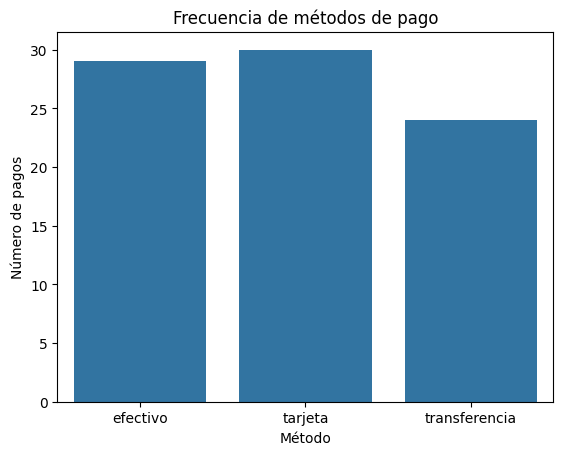

In [ ]:
sql_pay = """SELECT payment_method AS Metodo, COUNT(*) AS Frecuencia FROM Payments GROUP BY payment_method;"""
df_pay = pd.read_sql_query(sql_pay, conn)
sns.barplot(x='Metodo', y='Frecuencia', data=df_pay)
plt.title('Frecuencia de métodos de pago')
plt.ylabel('Número de pagos')
plt.xlabel('Método')
plt.show()

## Conclusión

Las consultas proporcionan una visión integral de la operación del hotel:

* **Demanda:** Identifica habitaciones más populares y tipos que generan más ingresos.  
* **Clientes clave:** Revela huéspedes con mayor impacto financiero.  
* **Calidad:** Ubica habitaciones con mejor calificación, fundamentales como referencia de servicio.  
* **Finanzas:** Evidencia la preferencia por métodos de pago y el promedio de duración de estadías.

Estos hallazgos permiten optimizar precios, mejorar la experiencia del huésped y maximizar la rentabilidad del negocio.


In [ ]:
conn.close()
print('Conexión cerrada')

Conexión cerrada
